In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
Y=data.target
X = data.data
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [4]:
import numpy as np
def sigmoid(z):
    a=1.0/(1.0+ np.exp(-z))
    return a
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate,epochs,penalty='None',alpha=0):
        self.lr=learning_rate
        self.epochs=epochs
        self.penalty = penalty
        self.alpha=alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            
            dw = -np.dot(X.T,(y - y_pred))/n_samples

            if self.penalty == 'l1':
                dw += self.alpha
            elif self.penalty == 'l2':
                dw += 2*self.alpha*np.sum(self.weights)
                
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias
        Y_proba_pred=y_pred
        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return (Y_proba_pred,y_pred)

In [5]:
# Create an instance of LogisticRegression
logreg1 = LogisticRegression(0.1,3000) #Play around with different learning rates and epochs
logreg2 = LogisticRegression(0.1,3000,penalty='l1',alpha=0.01)
logreg3 = LogisticRegression(0.1,3000,penalty='l1',alpha=0.01)

# Train the model
logreg1.fit(X_train,y_train)
logreg2.fit(X_train,y_train)
logreg3.fit(X_train,y_train)

# Make predictions on the test set
Y_proba_pred1,y_pred1 = logreg1.predict(X_test)
Y_proba_pred2,y_pred2 = logreg2.predict(X_test)
Y_proba_pred3,y_pred3 = logreg3.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))

0.9790209790209791
0.958041958041958
0.958041958041958


In [7]:
from sklearn.linear_model import LogisticRegression as LR
logreg4 = LR(penalty=None)
logreg5 = LR(penalty='l1',solver='saga')
logreg6 = LR(penalty="l2")
logreg7 = LR(penalty="elasticnet",l1_ratio=0.4,solver='saga')

logreg4.fit(X_train,y_train)
logreg5.fit(X_train,y_train)
logreg6.fit(X_train,y_train)
logreg7.fit(X_train,y_train)

y_pred4 = logreg4.predict(X_test)
y_pred5 = logreg5.predict(X_test)
y_pred6 = logreg6.predict(X_test)
y_pred7 = logreg6.predict(X_test)

print(accuracy_score(y_test,y_pred4))
print(accuracy_score(y_test,y_pred5))
print(accuracy_score(y_test,y_pred6))
print(accuracy_score(y_test,y_pred7))

0.9370629370629371
0.972027972027972
0.9790209790209791
0.9790209790209791


C:\Users\sonuk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:
from sklearn.metrics import classification_report
target_names = data.target_names
print(classification_report(y_test, y_pred1, target_names=target_names))
print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.98      0.97        54
      benign       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        54
      benign       0.96      1.00      0.98        89

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred5))

[[53  1]
 [ 2 87]]
[[50  4]
 [ 0 89]]


In [10]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, logreg5.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, Y_proba_pred2))

0.9977111943404078
0.9626508531002914


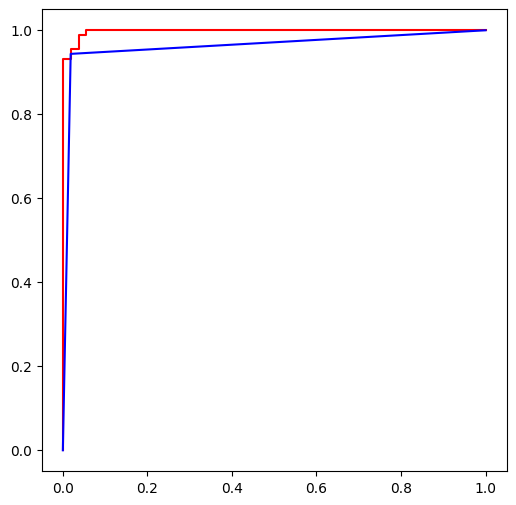

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
fpr1, tpr1, _ = roc_curve(y_test, logreg5.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, _= roc_curve(y_test, Y_proba_pred2, pos_label=1)
plt.plot(fpr1,tpr1,color='red')
plt.plot(fpr2,tpr2,color='blue')
plt.show()